In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns
import math

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [283]:
import os 
os.chdir('/content/drive/My Drive/YoutubePersonal/Dataset/EDA project')

In [284]:
import os 
os.listdir()

['columns_description.csv',
 'application_data.csv',
 'EDA_CaseStudy.ipynb',
 '.ipynb_checkpoints',
 'Untitled.ipynb',
 'Untitled (1).ipynb',
 'previous_application.csv']

In [285]:
test = pd.read_csv("previous_application.csv")

In [286]:
train = pd.read_csv("application_data.csv")

In [287]:
train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [288]:
print (f"We have {train.shape[0]} rows and {train.shape[1]} columns (Features) in Training Dataset ")
print (f"We have {test.shape[0]} rows and {test.shape[1]} columns (Features) in Test Dataset ")

We have 307511 rows and 122 columns (Features) in Training Dataset 
We have 1670214 rows and 37 columns (Features) in Test Dataset 


In [289]:
for i in train.columns:
    print (i, ":" , train[i].unique())
    print ("-" *40)

SK_ID_CURR : [100002 100003 100004 ... 456253 456254 456255]
----------------------------------------
TARGET : [1 0]
----------------------------------------
NAME_CONTRACT_TYPE : ['Cash loans' 'Revolving loans']
----------------------------------------
CODE_GENDER : ['M' 'F' 'XNA']
----------------------------------------
FLAG_OWN_CAR : ['N' 'Y']
----------------------------------------
FLAG_OWN_REALTY : ['Y' 'N']
----------------------------------------
CNT_CHILDREN : [ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]
----------------------------------------
AMT_INCOME_TOTAL : [202500.  270000.   67500.  ...  96768.  546250.5 113062.5]
----------------------------------------
AMT_CREDIT : [ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]
----------------------------------------
AMT_ANNUITY : [24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]
----------------------------------------
AMT_GOODS_PRICE : [ 351000.  1129500.   135000.  ...  453465.   143977.5  743863.5]
-----

In [290]:
for i in train.columns:
    print(i , ":\n\n", train[i].value_counts())
    print("_"*40)
    print("_"*40)
    print ("\n")
    

SK_ID_CURR :

 100303    1
131861    1
158488    1
156441    1
160539    1
         ..
255446    1
257495    1
234968    1
237017    1
100401    1
Name: SK_ID_CURR, Length: 307511, dtype: int64
________________________________________
________________________________________


TARGET :

 0    282686
1     24825
Name: TARGET, dtype: int64
________________________________________
________________________________________


NAME_CONTRACT_TYPE :

 Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
________________________________________
________________________________________


CODE_GENDER :

 F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
________________________________________
________________________________________


FLAG_OWN_CAR :

 N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
________________________________________
________________________________________


FLAG_OWN_REALTY :

 Y    213312
N     94199
Na

In [291]:
print(train['FLAG_MOBIL'].value_counts())

1    307510
0         1
Name: FLAG_MOBIL, dtype: int64


In [292]:
print(train['FLAG_DOCUMENT_2'].value_counts())
print(train['FLAG_DOCUMENT_4'].value_counts())
print(train['FLAG_DOCUMENT_7'].value_counts())
print(train['FLAG_DOCUMENT_10'].value_counts())
print(train['FLAG_DOCUMENT_12'].value_counts())


0    307498
1        13
Name: FLAG_DOCUMENT_2, dtype: int64
0    307486
1        25
Name: FLAG_DOCUMENT_4, dtype: int64
0    307452
1        59
Name: FLAG_DOCUMENT_7, dtype: int64
0    307504
1         7
Name: FLAG_DOCUMENT_10, dtype: int64
0    307509
1         2
Name: FLAG_DOCUMENT_12, dtype: int64


In [293]:
## no benefit of FLAG_MOBIL and above flag_documents taking ahead 
#only 1 value for 0
train=train.drop('FLAG_MOBIL', axis=1)

In [294]:
train=train.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_4','FLAG_DOCUMENT_7','FLAG_DOCUMENT_10','FLAG_DOCUMENT_12'], axis=1)

In [295]:
## it is completely Unique
train =train.drop("SK_ID_CURR",axis=1)

In [296]:
train.shape

(307511, 115)

In [297]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(40)

,Total,Percent
COMMONAREA_MEDI,214865,0.698723
COMMONAREA_MODE,214865,0.698723
COMMONAREA_AVG,214865,0.698723
NONLIVINGAPARTMENTS_MEDI,213514,0.694330
NONLIVINGAPARTMENTS_AVG,213514,0.694330
NONLIVINGAPARTMENTS_MODE,213514,0.694330
FONDKAPREMONT_MODE,210295,0.683862
LIVINGAPARTMENTS_MEDI,210199,0.683550
LIVINGAPARTMENTS_AVG,210199,0.683550
LIVINGAPARTMENTS_MODE,210199,0.683550


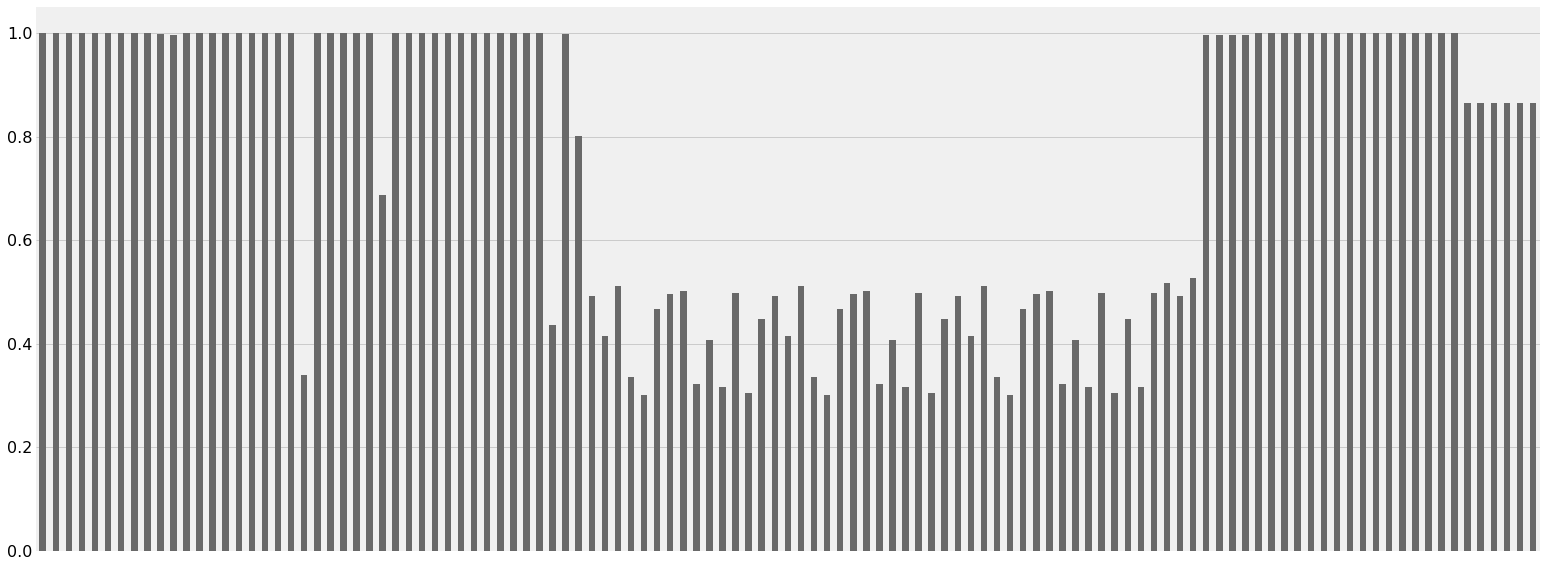

In [298]:
import missingno
missingno.bar(train)

In [299]:
missingcol = train.columns[train.isnull().mean()>0.4]
train=train.drop(missingcol, axis=1)

In [300]:
train.shape

(307511, 66)

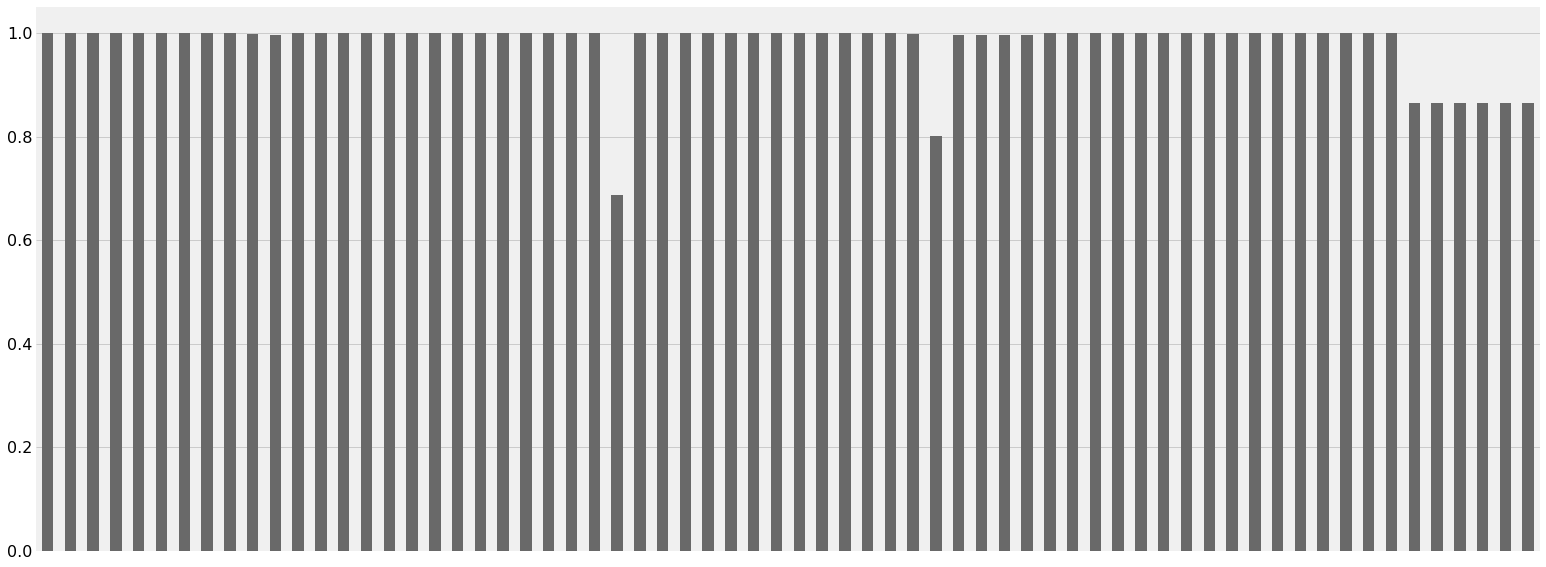

In [301]:
import missingno
missingno.bar(train)

In [302]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
OCCUPATION_TYPE,96391,0.313455
EXT_SOURCE_3,60965,0.198253
AMT_REQ_CREDIT_BUREAU_HOUR,41519,0.135016
AMT_REQ_CREDIT_BUREAU_QRT,41519,0.135016
AMT_REQ_CREDIT_BUREAU_YEAR,41519,0.135016
AMT_REQ_CREDIT_BUREAU_DAY,41519,0.135016
AMT_REQ_CREDIT_BUREAU_MON,41519,0.135016
AMT_REQ_CREDIT_BUREAU_WEEK,41519,0.135016
NAME_TYPE_SUITE,1292,0.004201
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.003320


In [311]:
train['AMT_REQ_CREDIT_BUREAU_DAY']=train['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(train['AMT_REQ_CREDIT_BUREAU_DAY'].mean())
train['AMT_REQ_CREDIT_BUREAU_MON']=train['AMT_REQ_CREDIT_BUREAU_MON'].fillna(train['AMT_REQ_CREDIT_BUREAU_MON'].mean())
train['AMT_REQ_CREDIT_BUREAU_QRT']=train['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(train['AMT_REQ_CREDIT_BUREAU_QRT'].mean())
train['AMT_REQ_CREDIT_BUREAU_WEEK']=train['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(train['AMT_REQ_CREDIT_BUREAU_WEEK'].mean())
train['AMT_REQ_CREDIT_BUREAU_YEAR']=train['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(train['AMT_REQ_CREDIT_BUREAU_YEAR'].mean())
train['AMT_REQ_CREDIT_BUREAU_HOUR']=train['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(train['AMT_REQ_CREDIT_BUREAU_HOUR'].mean())
train['DEF_60_CNT_SOCIAL_CIRCLE']=train['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(train['DEF_60_CNT_SOCIAL_CIRCLE'].mean())
train['DEF_30_CNT_SOCIAL_CIRCLE']=train['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(train['DEF_30_CNT_SOCIAL_CIRCLE'].mean())
train['OBS_30_CNT_SOCIAL_CIRCLE']=train['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(train['OBS_30_CNT_SOCIAL_CIRCLE'].mean())
train['OBS_60_CNT_SOCIAL_CIRCLE']=train['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(train['OBS_60_CNT_SOCIAL_CIRCLE'].mean())
train['AMT_ANNUITY']=train['AMT_ANNUITY'].fillna(train['AMT_ANNUITY'].mean())
train['EXT_SOURCE_2']=train['EXT_SOURCE_2'].fillna(train['EXT_SOURCE_2'].mean())
train['EXT_SOURCE_3']=train['EXT_SOURCE_3'].fillna(train['EXT_SOURCE_3'].mean())
train['AMT_GOODS_PRICE']=train['AMT_GOODS_PRICE'].fillna(train['AMT_GOODS_PRICE'].mean())
train['DAYS_LAST_PHONE_CHANGE']=train['DAYS_LAST_PHONE_CHANGE'].fillna(train['DAYS_LAST_PHONE_CHANGE'].median())
train['CNT_FAM_MEMBERS']=train['CNT_FAM_MEMBERS'].fillna(train['CNT_FAM_MEMBERS'].median())

In [312]:
train['CNT_FAM_MEMBERS']=train['CNT_FAM_MEMBERS'].astype(int)
train['NAME_TYPE_SUITE']=train['NAME_TYPE_SUITE'].astype(str)
train['OCCUPATION_TYPE']=train['OCCUPATION_TYPE'].astype(str)
train['CNT_FAM_MEMBERS']=train['CNT_FAM_MEMBERS'].fillna(train['CNT_FAM_MEMBERS'].median())
train['OCCUPATION_TYPE']=train['OCCUPATION_TYPE'].fillna(train['OCCUPATION_TYPE'].mode())
train['NAME_TYPE_SUITE']=train['NAME_TYPE_SUITE'].fillna(train['NAME_TYPE_SUITE'].mode())

In [313]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
AMT_REQ_CREDIT_BUREAU_YEAR,0,0.0
DAYS_BIRTH,0,0.0
HOUR_APPR_PROCESS_START,0,0.0
WEEKDAY_APPR_PROCESS_START,0,0.0
REGION_RATING_CLIENT_W_CITY,0,0.0
REGION_RATING_CLIENT,0,0.0
CNT_FAM_MEMBERS,0,0.0
OCCUPATION_TYPE,0,0.0
FLAG_EMAIL,0,0.0
FLAG_PHONE,0,0.0


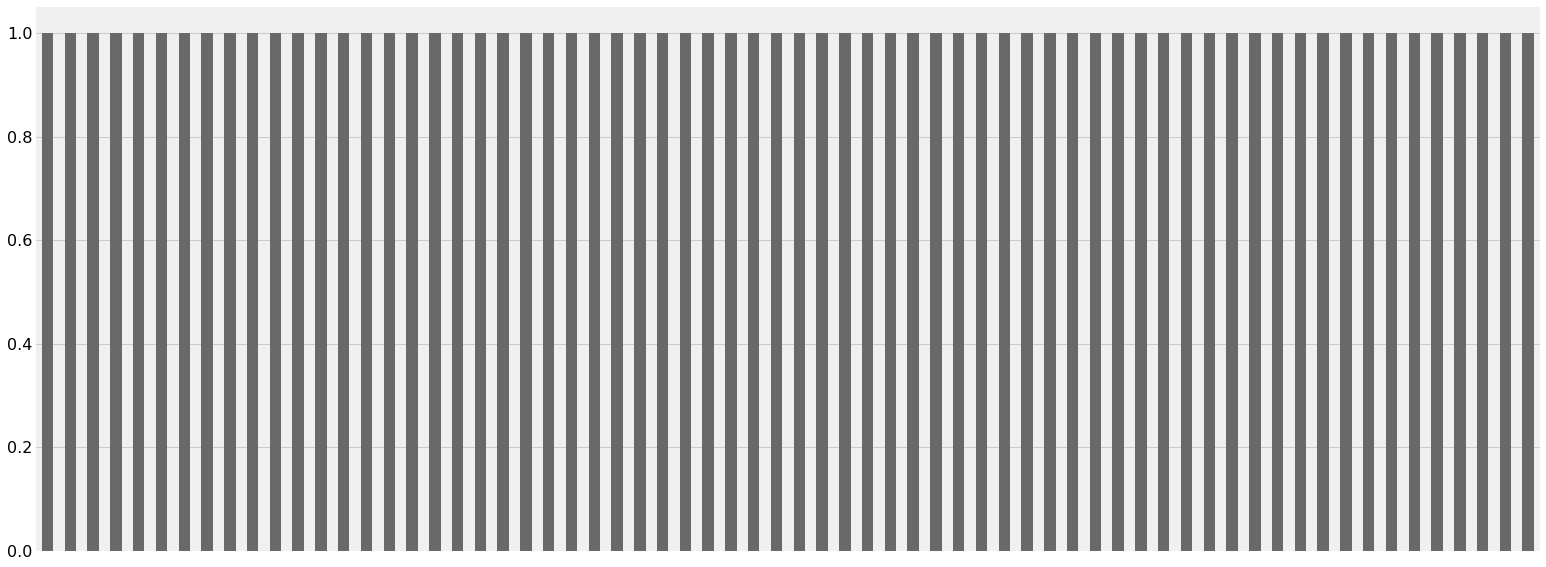

In [318]:
import missingno
missingno.bar(train)

In [319]:
train.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,16036.995067,67724.742149,4986.120328,16036.995067,0.819889,0.199368,0.998133,0.281066,0.056720,2.152664,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858119,0.710023,0.015115,0.088055,0.081376,0.003896,0.003912,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.454517,3.692794e+05,0.013831,4363.988632,139443.751806,3522.886321,4363.988632,0.384280,0.399526,0.043164,0.449521,0.231307,0.910679,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.908550e-01,0.174464,2.397000,0.445956,2.375849,0.361689,826.807226,0.453752,0.122010,0.283376,0.273412,0.062295,0.062424,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.077983,0.103009,0.190366,0.851923,0.738507,1.738528
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,0.000000,7489.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,2010.000000,12413.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.929737e-01,0.417100,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,4504

In [320]:
train['DAYS_BIRTH'] = train['DAYS_BIRTH'].abs()
train['DAYS_REGISTRATION'] = train['DAYS_REGISTRATION'].abs()
train['DAYS_ID_PUBLISH'] = train['DAYS_BIRTH'].abs()
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].abs()

In [321]:
train.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,16036.995067,67724.742149,4986.120328,16036.995067,0.819889,0.199368,0.998133,0.281066,0.056720,2.152664,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858119,0.710023,0.015115,0.088055,0.081376,0.003896,0.003912,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.454517,3.692794e+05,0.013831,4363.988632,139443.751806,3522.886321,4363.988632,0.384280,0.399526,0.043164,0.449521,0.231307,0.910679,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.908550e-01,0.174464,2.397000,0.445956,2.375849,0.361689,826.807226,0.453752,0.122010,0.283376,0.273412,0.062295,0.062424,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.077983,0.103009,0.190366,0.851923,0.738507,1.738528
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,0.000000,7489.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,2010.000000,12413.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.929737e-01,0.417100,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,4504

In [322]:
train.shape

(307511, 66)

In [323]:
numeric_train= train.select_dtypes(include=[np.number])
numerical=numeric_train.columns.tolist()

categoric_train=train.select_dtypes(exclude=[np.number])
categorical=categoric_train.columns.tolist()

print ("Category :",categorical)
print ("-"*100)
print ("Numeric :",numerical)


Category : ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
----------------------------------------------------------------------------------------------------
Numeric : ['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL

In [324]:
## Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d42f61198>,
      dtype=object)

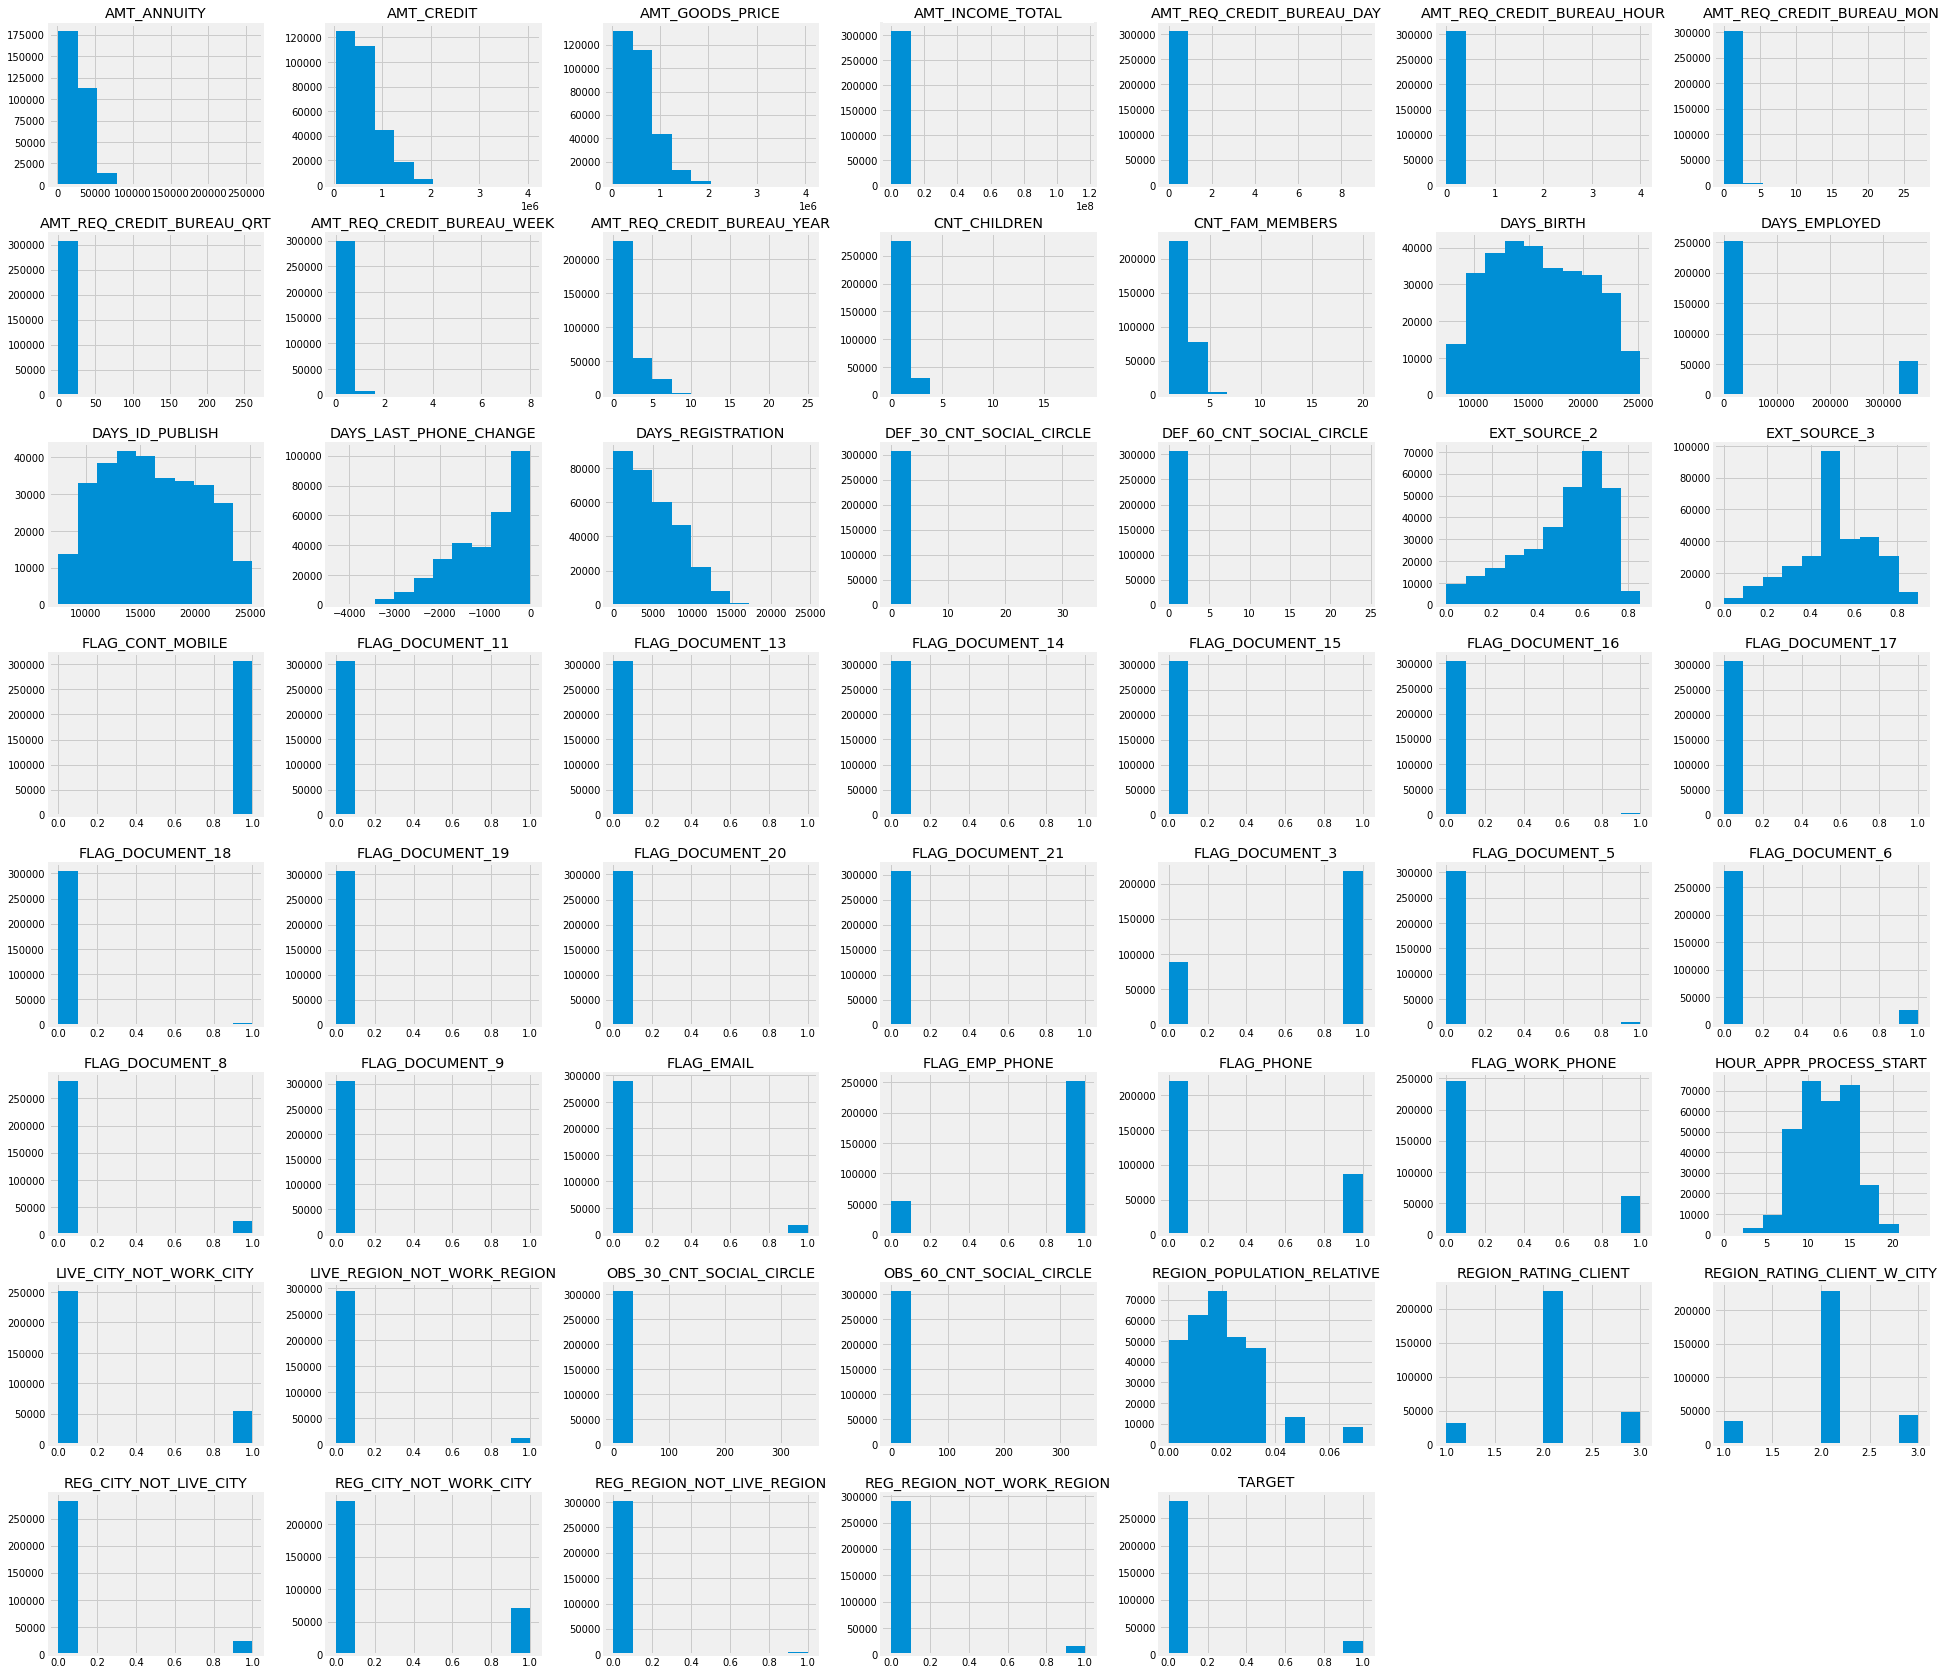

In [325]:
numeric_train.hist(figsize=(30,30))

In [326]:
realnumeric_col = ['AMT_INCOME_TOTAL','TARGET' ,'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE','EXT_SOURCE_2', 'EXT_SOURCE_3','REGION_POPULATION_RELATIVE','HOUR_APPR_PROCESS_START']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d43a8d198>,
      dtype=object)

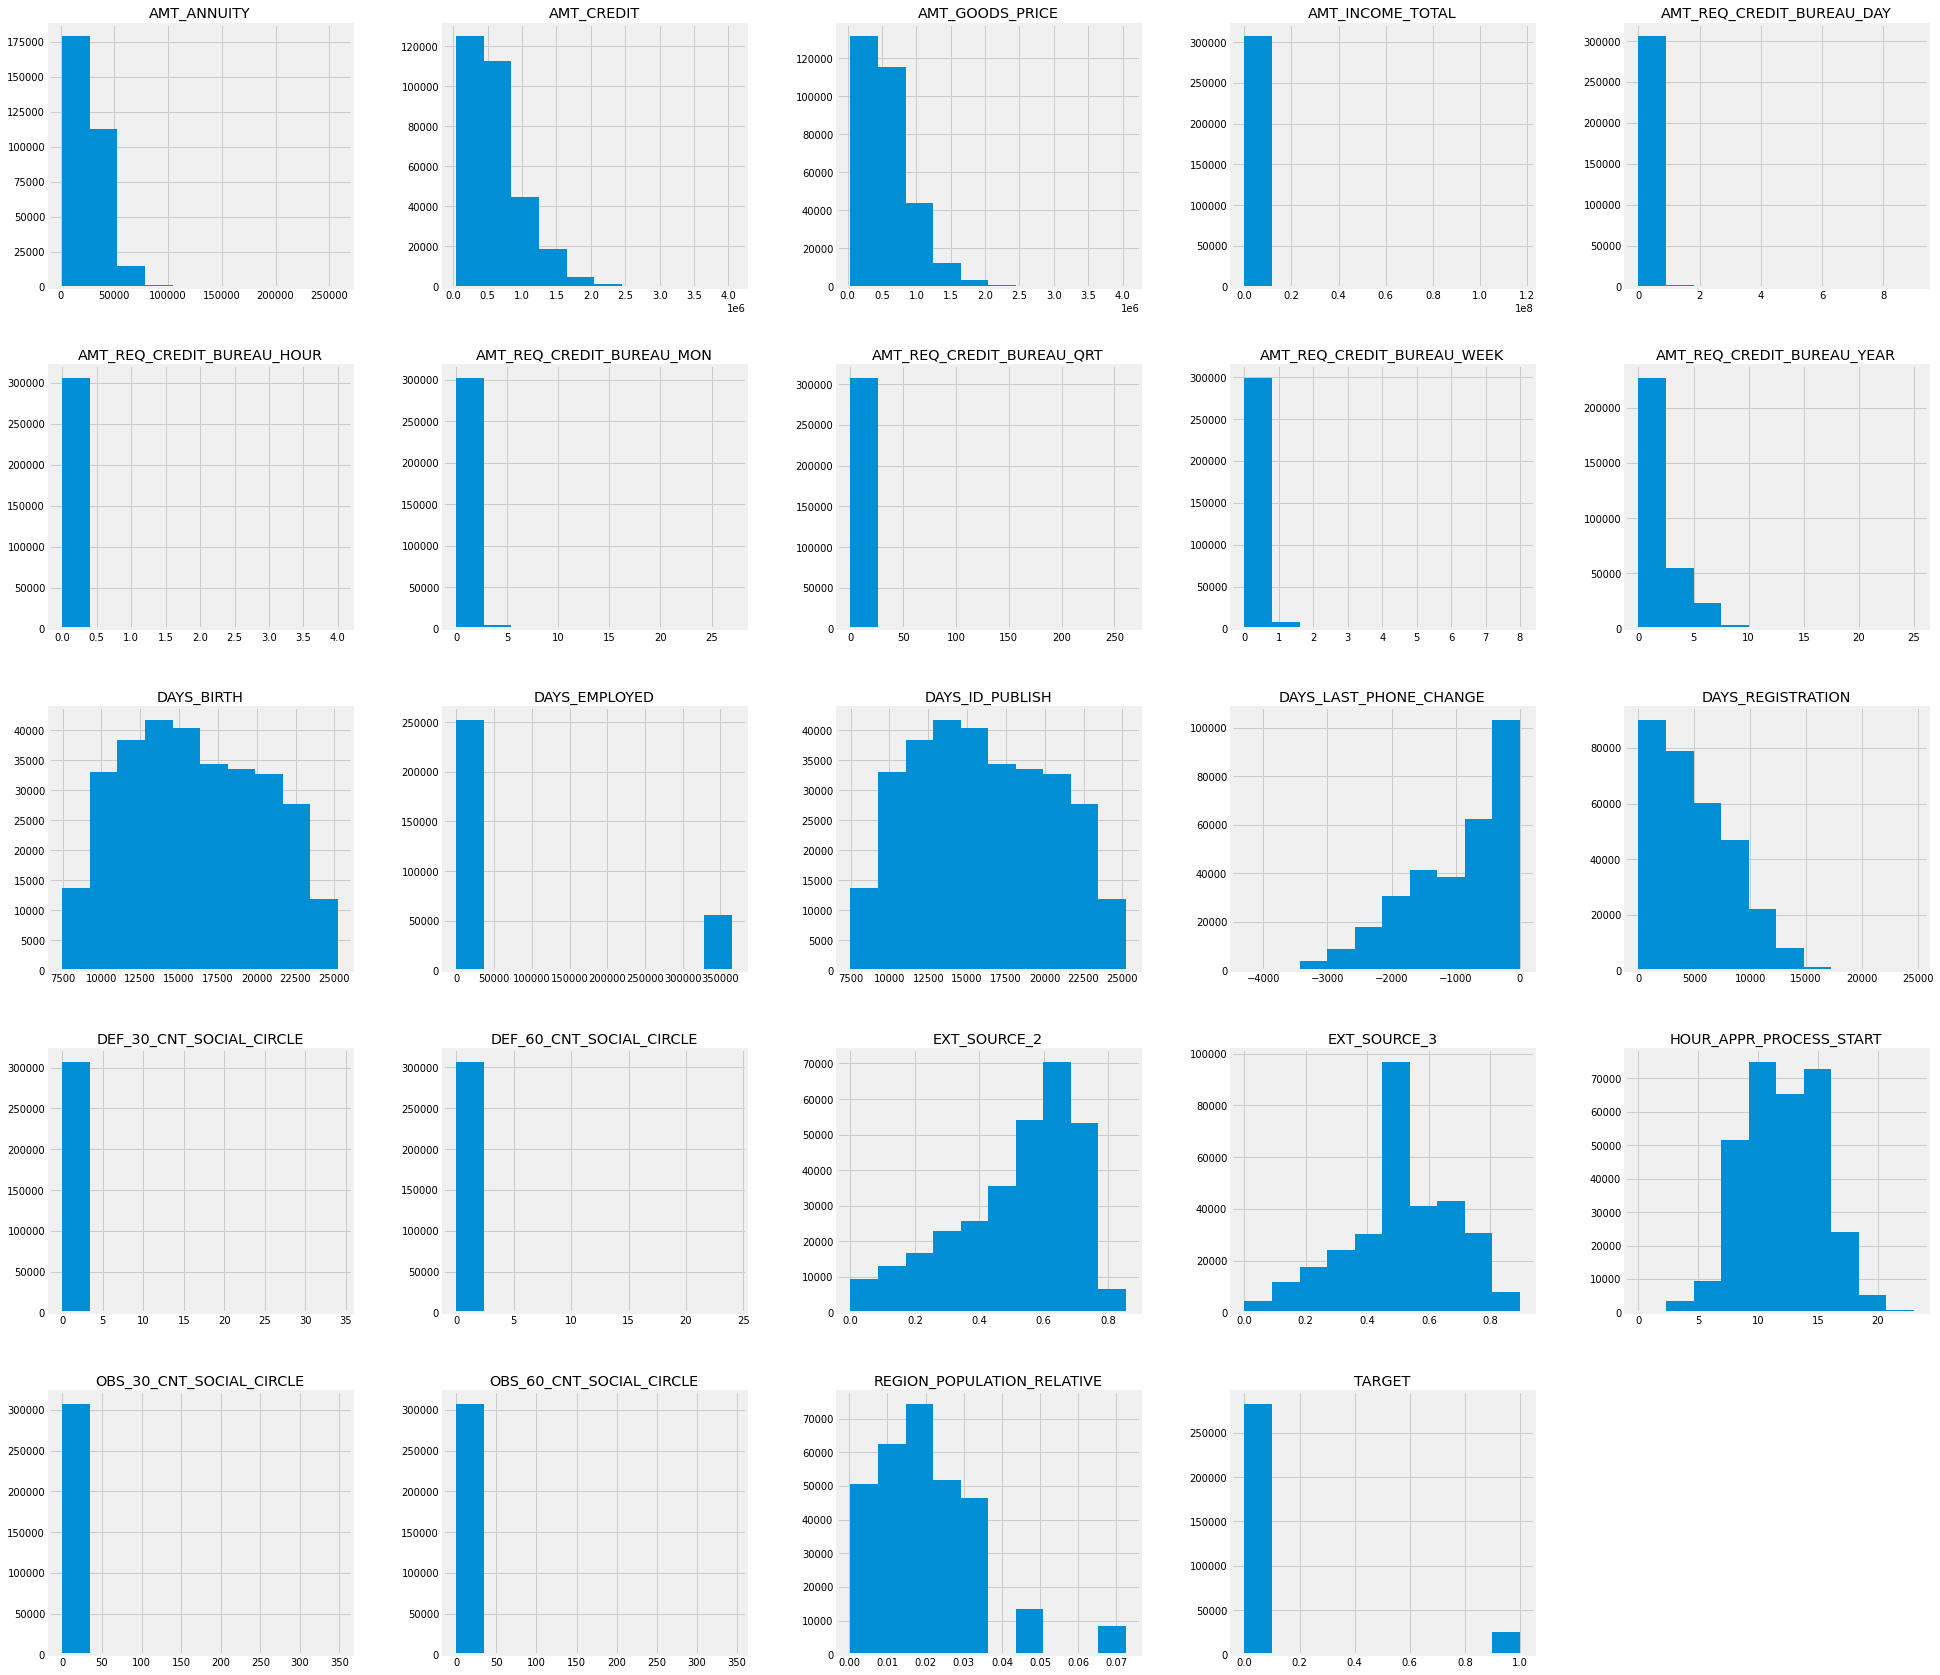

In [327]:
train[realnumeric_col].hist(figsize=(30,30))

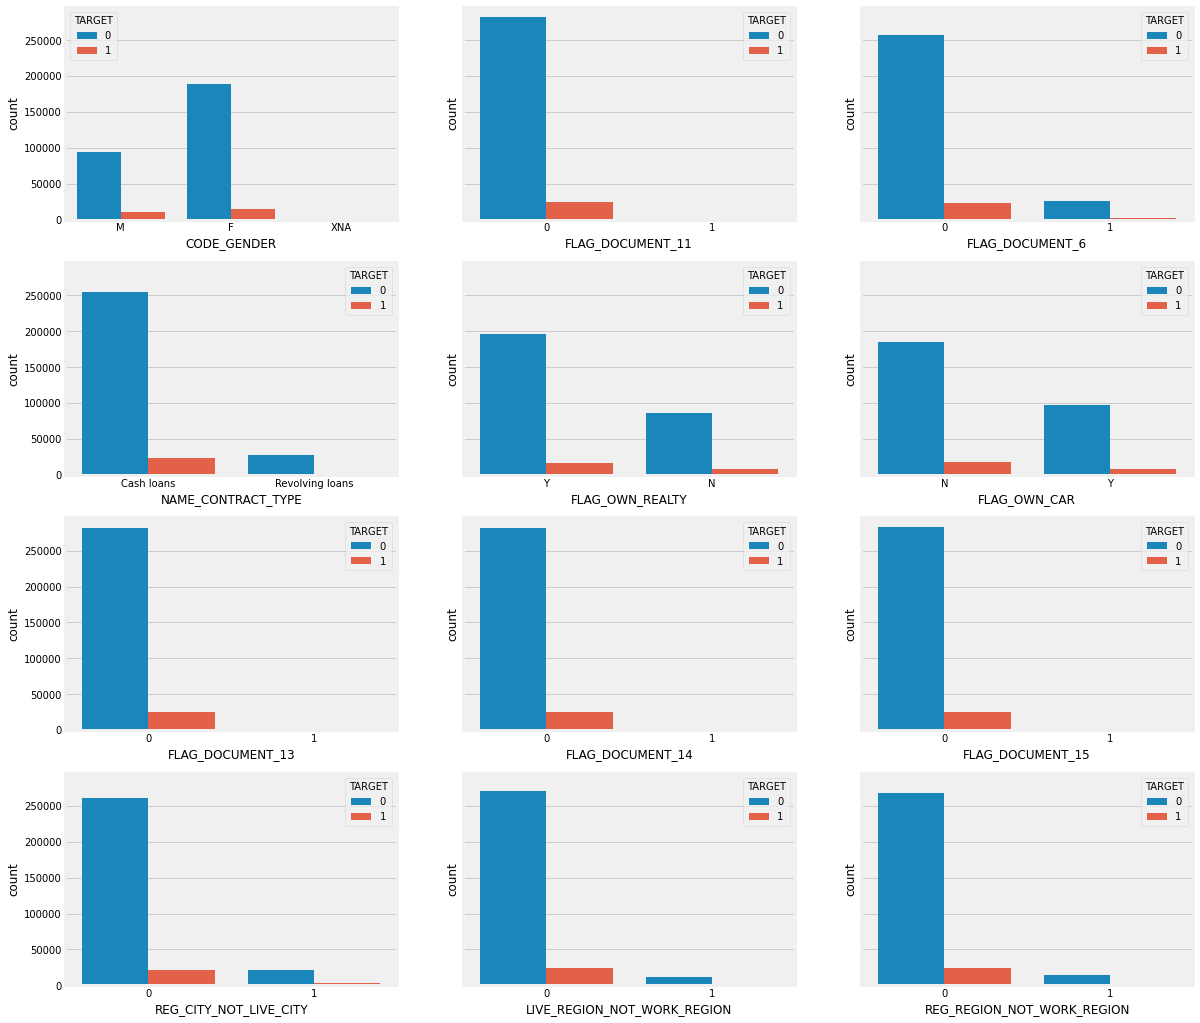

In [328]:
fig,ax= plt.subplots(4,3, sharey= True,figsize=(18, 18))

sns.countplot ( train.CODE_GENDER,hue=train.TARGET,ax=ax[0][0])
sns.countplot ( train.FLAG_DOCUMENT_11,hue=train.TARGET,ax=ax[0][1])
sns.countplot ( train.FLAG_DOCUMENT_6,hue=train.TARGET,ax=ax[0][2])
sns.countplot ( train.NAME_CONTRACT_TYPE,hue=train.TARGET,ax=ax[1][0])
sns.countplot ( train.FLAG_OWN_REALTY,hue=train.TARGET,ax=ax[1][1])
sns.countplot ( train.FLAG_OWN_CAR,hue=train.TARGET,ax=ax[1][2])
sns.countplot ( train.FLAG_DOCUMENT_13,hue=train.TARGET,ax=ax[2][0])
sns.countplot ( train.FLAG_DOCUMENT_14,hue=train.TARGET,ax=ax[2][1])
sns.countplot ( train.FLAG_DOCUMENT_15,hue=train.TARGET,ax=ax[2][2])
sns.countplot ( train.REG_CITY_NOT_LIVE_CITY,hue=train.TARGET,ax=ax[3][0])
sns.countplot ( train.LIVE_REGION_NOT_WORK_REGION,hue=train.TARGET,ax=ax[3][1])
sns.countplot ( train.REG_REGION_NOT_WORK_REGION,hue=train.TARGET,ax=ax[3][2])

AttributeError: ignored

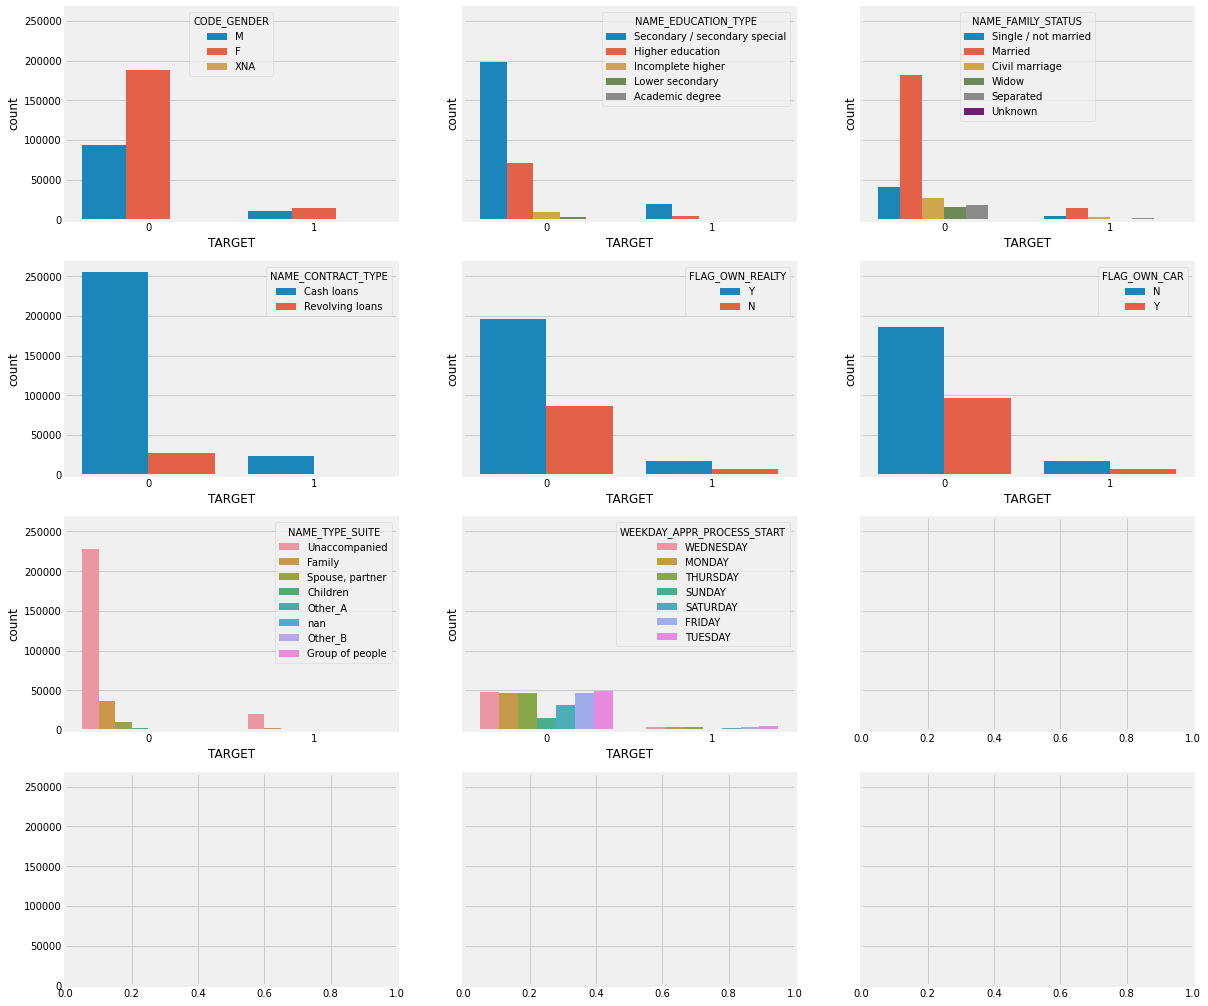

In [330]:
## MultiVariate Analysis

fig,ax= plt.subplots(4,3, sharey= True,figsize=(18, 18))
sns.countplot ( train.TARGET,hue=train.CODE_GENDER,ax=ax[0][0])
sns.countplot ( train.TARGET,hue=train.NAME_EDUCATION_TYPE,ax=ax[0][1])
sns.countplot ( train.TARGET,hue=train.NAME_FAMILY_STATUS,ax=ax[0][2])
sns.countplot ( train.TARGET,hue=train.NAME_CONTRACT_TYPE,ax=ax[1][0])
sns.countplot ( train.TARGET,hue=train.FLAG_OWN_REALTY,ax=ax[1][1])
sns.countplot ( train.TARGET,hue=train.FLAG_OWN_CAR,ax=ax[1][2])
sns.countplot ( train.TARGET,hue=train.NAME_TYPE_SUITE ,ax=ax[2][0])
sns.countplot ( train.TARGET,hue=train.WEEKDAY_APPR_PROCESS_START,ax=ax[2][1])
sns.countplot ( train.TARGET,hue=train.EMERGENCYSTATE_MODE,ax=ax[2][2])
sns.countplot ( train.TARGET,hue=train.NAME_INCOME_TYPE ,ax=ax[3][0])
sns.countplot ( train.TARGET,hue=train.NAME_HOUSING_TYPE,ax=ax[3][1])
#sns.countplot ( train.TARGET,hue=train.OCCUPATION_TYPE,ax=ax[3][2])


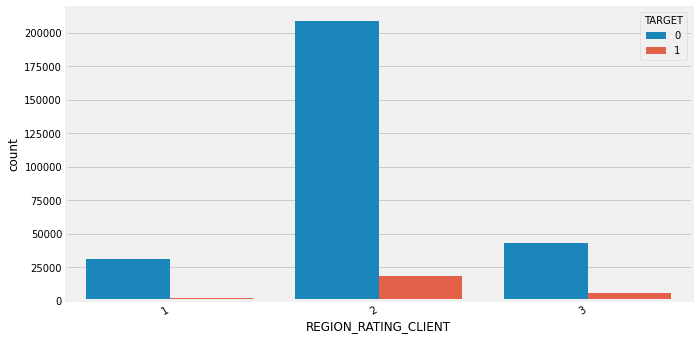

In [331]:
fig=plt.figure(figsize=(10,6))
sns.countplot(x='REGION_RATING_CLIENT',hue='TARGET',data=train)
fig.autofmt_xdate()
plt.show()

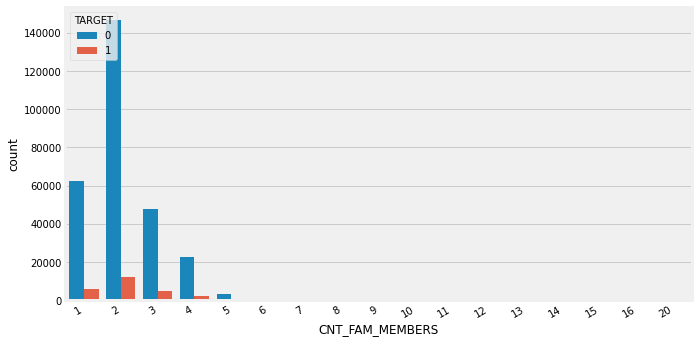

In [332]:
fig=plt.figure(figsize=(10,6))
sns.countplot(x='CNT_FAM_MEMBERS',hue='TARGET',data=train)
fig.autofmt_xdate()
plt.show()

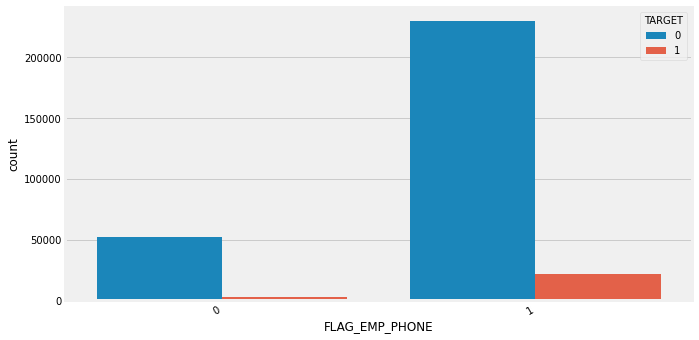

In [333]:
fig=plt.figure(figsize=(10,6))
sns.countplot(x='FLAG_EMP_PHONE',hue='TARGET',data=train)
fig.autofmt_xdate()
plt.show()


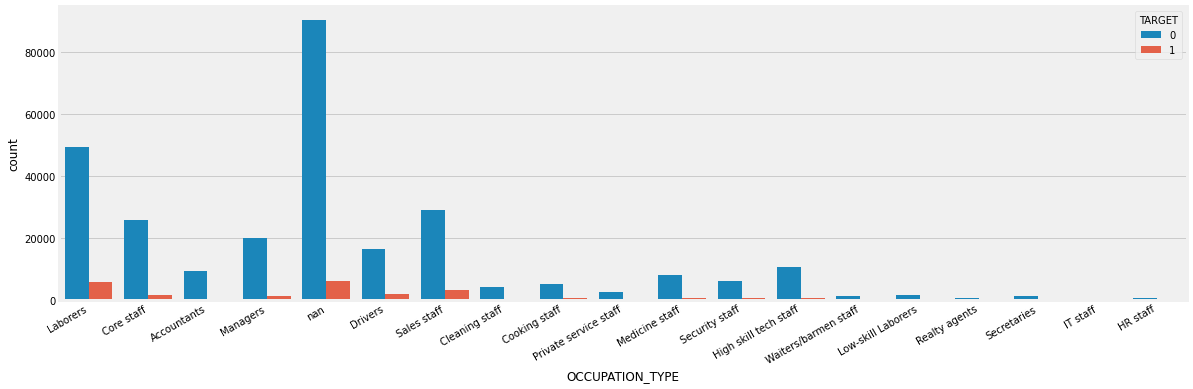

In [334]:
fig=plt.figure(figsize=(18,6))
sns.countplot(x='OCCUPATION_TYPE',hue='TARGET',data=train)
fig.autofmt_xdate()
plt.show()

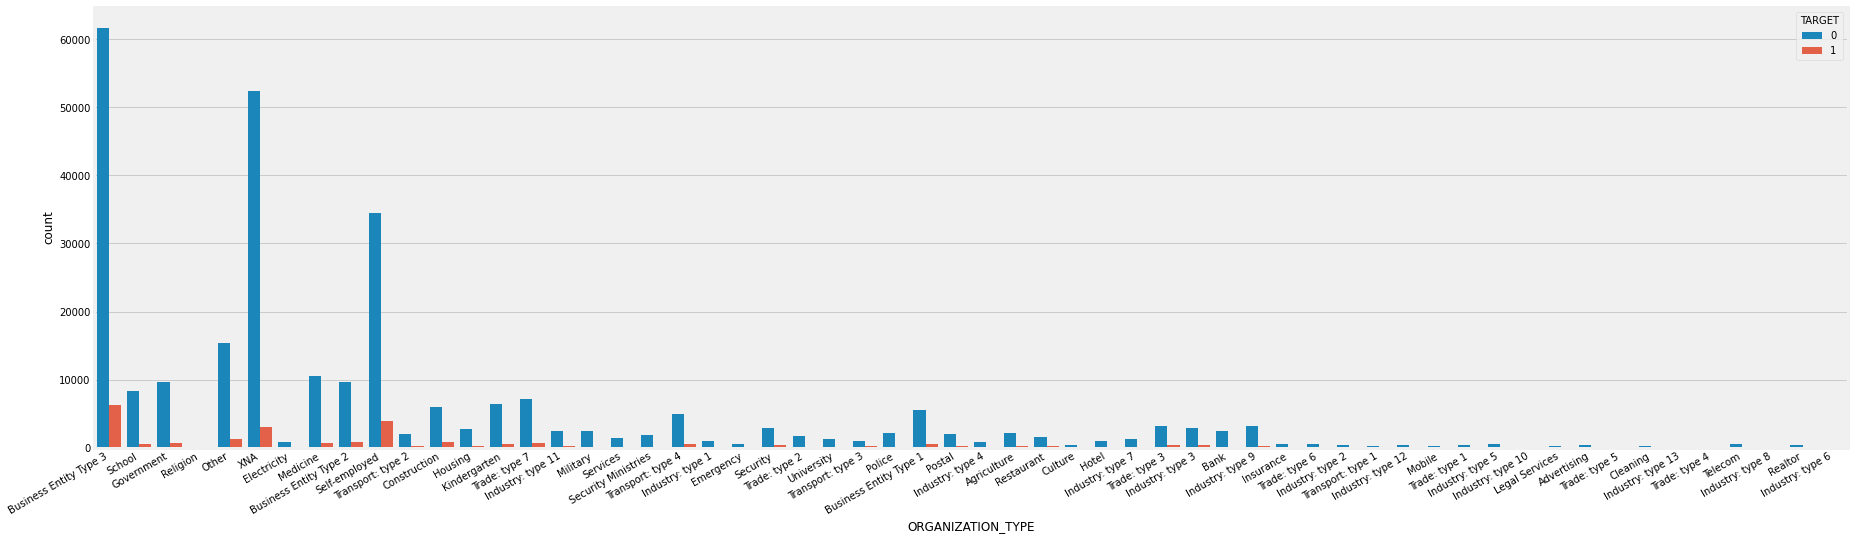

In [335]:
fig=plt.figure(figsize=(28,9))
sns.countplot(x='ORGANIZATION_TYPE',hue='TARGET',data=train)
fig.autofmt_xdate()
plt.show()

In [336]:
categorical

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [348]:
realnumeric_train = train[realnumeric_col]
x= numeric_train.drop('TARGET',axis=1)  #independent columns
y = train['TARGET']   #target column i

In [339]:
corr=realnumeric_train.corr()

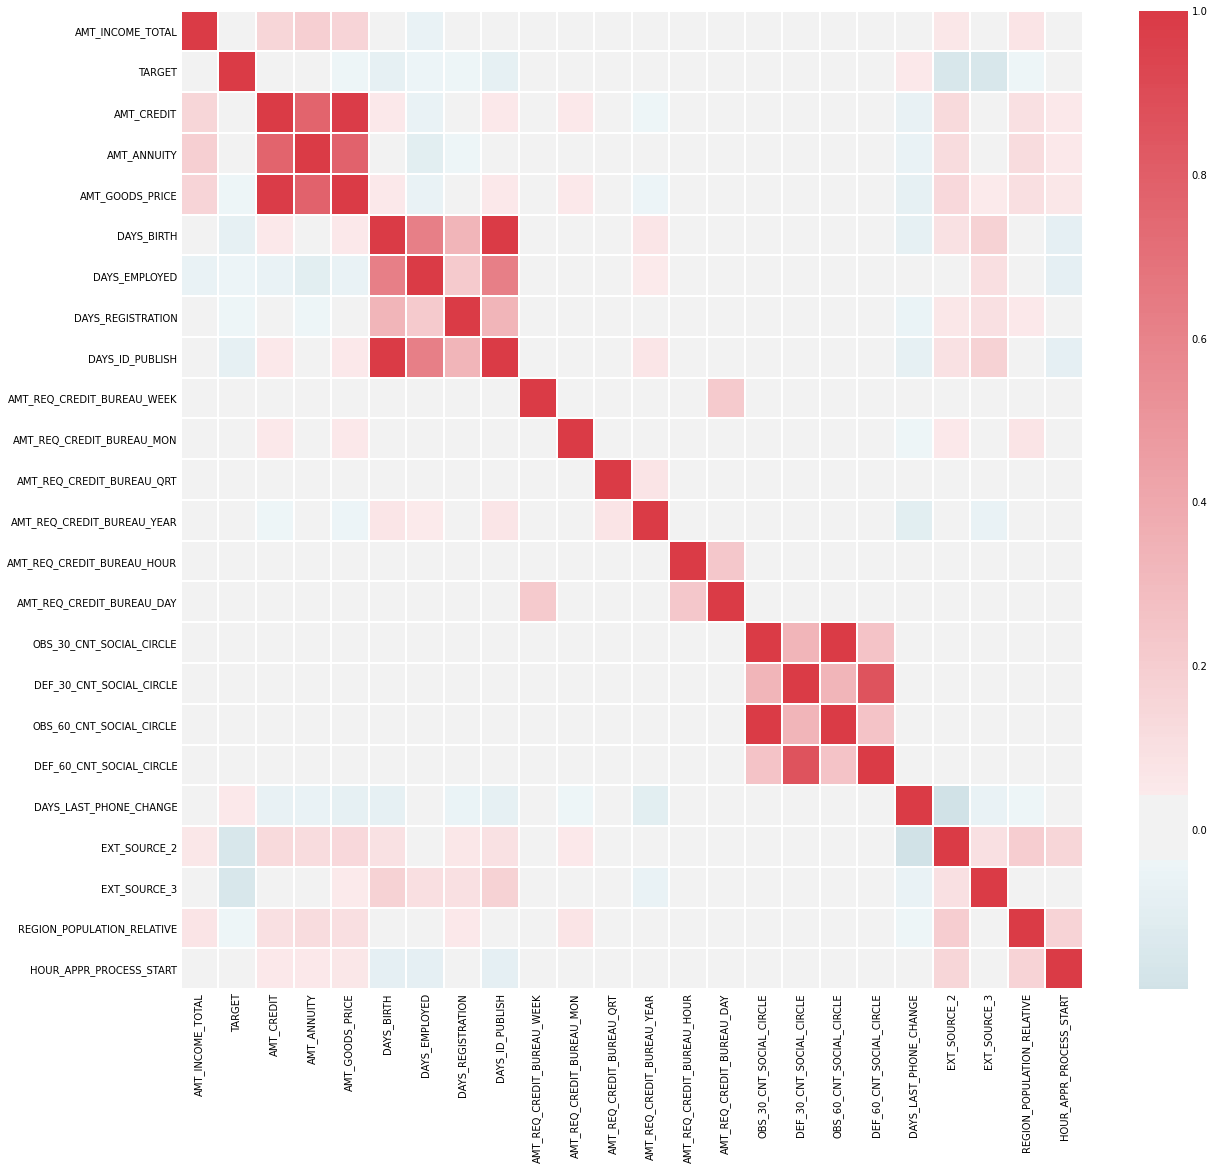

In [340]:

f, ax = plt.subplots(figsize=(18, 18))


cmap = sns.diverging_palette(220, 10, as_cmap=True)


heatmap = sns.heatmap(corr,cmap=cmap, center=0.0,vmax = 1, linewidths=1, ax=ax)
plt.show()

In [344]:


from statsmodels.stats.outliers_influence import variance_inflation_factor
x.dropna()
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif["features"] = x.columns
vif

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,6.191825,CNT_CHILDREN
1,1.588115,AMT_INCOME_TOTAL
2,132.370791,AMT_CREDIT
3,12.327552,AMT_ANNUITY
4,131.575851,AMT_GOODS_PRICE
5,4.713302,REGION_POPULATION_RELATIVE
6,inf,DAYS_BIRTH
7,122.617609,DAYS_EMPLOYED
8,3.463839,DAYS_REGISTRATION
9,inf,DAYS_ID_PUBLISH


In [350]:
x=x.drop(['FLAG_EMP_PHONE','FLAG_CONT_MOBILE','OBS_30_CNT_SOCIAL_CIRCLE','REGION_RATING_CLIENT_W_CITY','AMT_GOODS_PRICE'],axis=1)

In [351]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif["features"] = x.columns
vif

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,6.145270,CNT_CHILDREN
1,1.585730,AMT_INCOME_TOTAL
2,8.300201,AMT_CREDIT
3,11.902835,AMT_ANNUITY
4,4.567349,REGION_POPULATION_RELATIVE
5,inf,DAYS_BIRTH
6,2.821009,DAYS_EMPLOYED
7,3.457893,DAYS_REGISTRATION
8,inf,DAYS_ID_PUBLISH
9,1.520681,FLAG_WORK_PHONE


[2.27770862e-02 4.78068493e-02 4.70583849e-02 4.74507198e-02
 4.53770552e-02 4.68094519e-02 4.96310338e-02 4.35500601e-02
 4.99474201e-02 4.98311472e-02 1.39181060e-03 1.20865241e-02
 6.23143127e-04 1.35037877e-02 8.28961108e-03 3.16468718e-02
 7.97460767e-03 7.84989214e-03 4.73918076e-02 1.81991912e-03
 4.05427536e-03 3.52892127e-03 4.66529111e-03 4.54418452e-03
 5.15831477e-03 7.12501400e-02 6.32041361e-02 3.20108631e-02
 1.31527136e-02 3.19024210e-02 1.02337166e-02 4.89124928e-02
 6.22478510e-03 2.06901773e-03 2.35178179e-03 3.64711349e-03
 7.13646910e-04 5.61196419e-04 4.65392273e-04 4.30290122e-04
 2.18870165e-04 1.68502578e-03 6.42535229e-05 1.63552992e-03
 2.65996121e-04 2.02664341e-04 2.30668433e-04 7.05105740e-03
 7.29296027e-03 1.03140209e-02 2.05105823e-02 2.10645927e-02
 3.75659006e-02]


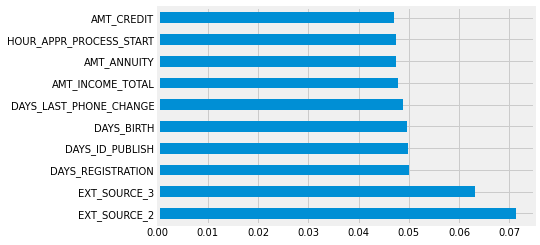

In [352]:

x= numeric_train.drop('TARGET',axis=1)  #independent columns
y = train['TARGET']   #target column i
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [356]:
x=x.abs()

In [357]:


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                     Specs         Score
7            DAYS_EMPLOYED  1.954124e+08
4          AMT_GOODS_PRICE  1.223153e+08
2               AMT_CREDIT  7.669986e+07
6               DAYS_BIRTH  2.235391e+06
9          DAYS_ID_PUBLISH  2.235391e+06
1         AMT_INCOME_TOTAL  1.624101e+06
8        DAYS_REGISTRATION  1.348566e+06
31  DAYS_LAST_PHONE_CHANGE  6.656876e+05
3              AMT_ANNUITY  3.914270e+05
23  REG_CITY_NOT_WORK_CITY  6.153774e+02
